In [1]:
# Dependencies
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime

In [2]:
nb_loc = os.getcwd()
zecon_dataset_loc = os.path.join(nb_loc,'datasets','zecon')
datasets = os.listdir(zecon_dataset_loc)
template = pd.DataFrame({'name': [],
                        'contents' : []})
zdata = template
# for file in datasets:
#     tokens = file.split('.')
#     file_ext = tokens[-1]
#     if file_ext == 'json':
#         contents = pd.read_json(os.path.join(zecon_dataset_loc,file))
#     elif file_ext == 'csv':
#         contents = pd.read_csv(os.path.join(zecon_dataset_loc,file))
#     name = file
    # Need to create system to store each files data separately...
    
    

In [3]:
crosswalk = pd.read_csv(os.path.join(zecon_dataset_loc,datasets[4]))

In [5]:
city_time_series = pd.read_csv(os.path.join(zecon_dataset_loc,datasets[2]))

In [7]:
combine = city_time_series.merge(crosswalk,right_on = 'Unique_City_ID', left_on = 'RegionName')

In [17]:
combine.groupby(['State','County'])['RegionName'].count()

State  County              
AK     Anchorage                229
       Fairbanks North Star     458
       Juneau                   240
       Kenai Peninsula         1359
       Ketchikan Gateway        139
       Kodiak Island            139
       Matanuska Susitna       1513
       Nome                     122
       Sitka                     63
       Valdez Cordova             2
AL     Autauga                  578
       Baldwin                 4567
       Barbour                  311
       Bibb                     350
       Blount                   958
       Bullock                   43
       Butler                   259
       Calhoun                 1236
       Chambers                 394
       Cherokee                 352
       Chilton                  718
       Clarke                   120
       Clay                     333
       Cleburne                 530
       Coffee                   502
       Colbert                  498
       Conecuh                  567


In [9]:
print(len(city_time_series['RegionName']))
print(len(crosswalk[['City']]))

4172721
25341


In [10]:
sample = city_time_series[['Date','RegionName',
                      'PriceToRentRatio_AllHomes','MedianSoldPrice_AllHomes',
                     'MedianSoldPricePerSqft_AllHomes']].dropna(how='any')

In [11]:
def str2unix(s):
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple())
def convert_timescale(x):
    return x/(60*60*24*365)

In [12]:
print(sample['Date'].head())
print(sample['Date'].tail())

2346102    2010-10-31
2346109    2010-10-31
2346111    2010-10-31
2346113    2010-10-31
2346122    2010-10-31
Name: Date, dtype: object
3868199    2016-06-30
3868204    2016-06-30
3868209    2016-06-30
3868220    2016-06-30
3868222    2016-06-30
Name: Date, dtype: object


In [13]:
print(sample['Date'].head().apply(str2unix).apply(convert_timescale))
print(sample['Date'].tail().apply(str2unix).apply(convert_timescale))

2346102    40.858333
2346109    40.858333
2346111    40.858333
2346113    40.858333
2346122    40.858333
Name: Date, dtype: float64
3868199    46.526826
3868204    46.526826
3868209    46.526826
3868220    46.526826
3868222    46.526826
Name: Date, dtype: float64


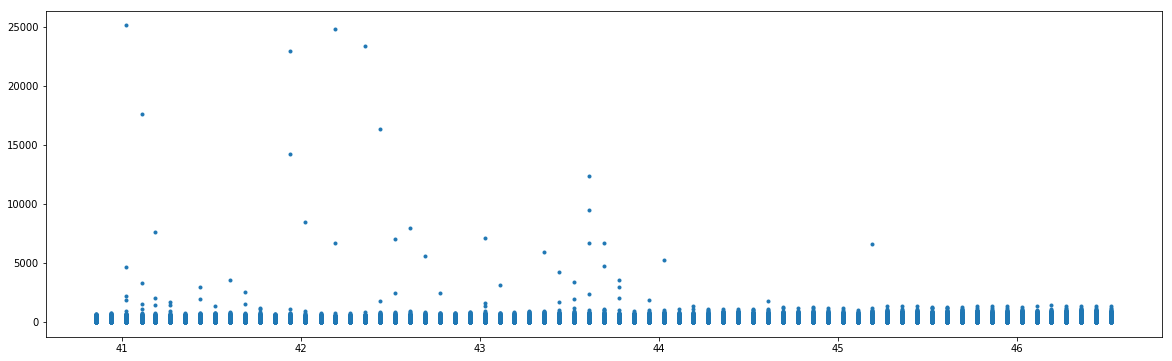

In [14]:
plt.figure(figsize=[20,6])
plt.plot(sample['Date'].apply(str2unix).apply(convert_timescale),sample['MedianSoldPricePerSqft_AllHomes'],'.')
plt.show()

In [15]:
# regions = sample['RegionName'].unique()
# for region in regions:
#     dates = sample.loc[sample['RegionName']==region,'Date'].apply(str2unix).apply(convert_timescale)
#     price = sample.loc[sample['RegionName']==region,'MedianSoldPricePerSqft_AllHomes']
#     plt.plot(dates,price)
# # plt.ylim([0,500])
# plt.show()

In [16]:
city_time_series.keys()

Index(['Date', 'RegionName', 'HomesSoldAsForeclosuresRatio_AllHomes',
       'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes',
       'MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex',
       'MedianListingPrice_SingleFamilyResidence',
       'MedianPctOfPriceReduction_AllHomes',
       'MedianPctOfPriceReduction_CondoCoop'